# **Task Details**

What is known about transmission, incubation, and environmental stability? What do we know about natural history, transmission, and diagnostics for the virus? What have we learned about infection prevention and control?

Specifically, we want to know what the literature reports about:

Range of incubation periods for the disease in humans (and how this varies across age and health status) and how long individuals are contagious, even after recovery.

Prevalence of asymptomatic shedding and transmission (e.g., particularly children).

Seasonality of transmission.

Physical science of the coronavirus (e.g., charge distribution, adhesion to hydrophilic/phobic surfaces, environmental survival to inform decontamination efforts for affected areas and provide information about viral shedding).

Persistence and stability on a multitude of substrates and sources (e.g., nasal discharge, sputum, urine, fecal matter, blood).

Persistence of virus on surfaces of different materials (e,g., copper, stainless steel, plastic).

Natural history of the virus and shedding of it from an infected person

Implementation of diagnostics and products to improve clinical processes

Disease models, including animal models for infection, disease and transmission

Tools and studies to monitor phenotypic change and potential adaptation of the virus

Immune response and immunity

Effectiveness of movement control strategies to prevent secondary transmission in health care and community settings

Effectiveness of personal protective equipment (PPE) and its usefulness to reduce risk of transmission in health care and community settings
Role of the environment in transmission

# **Approach to Solve This Problem**

1. ** Analysis (MetaData Articles) **


    * Analysis Over The Source Of Research Paper
        * Counts Of Source
        * Distribution Of Source
        
    * Analysis Over The Abstract Data
        * Word Cloud
        * Distribution Of Letters in the Abstracts. 
        
    *  Named Entity Recognition
    
    * Dependency Parser Analysis (Graph Representation)
    


2. ** Modeling **


    * Analysis Over The Embeddings 
        * Training Embedding Over The Research Data. 
        * Plotting The Embedding Vectors
        
    *  Query Expansion
    
    *  Bert Question Answering Module 
   
     

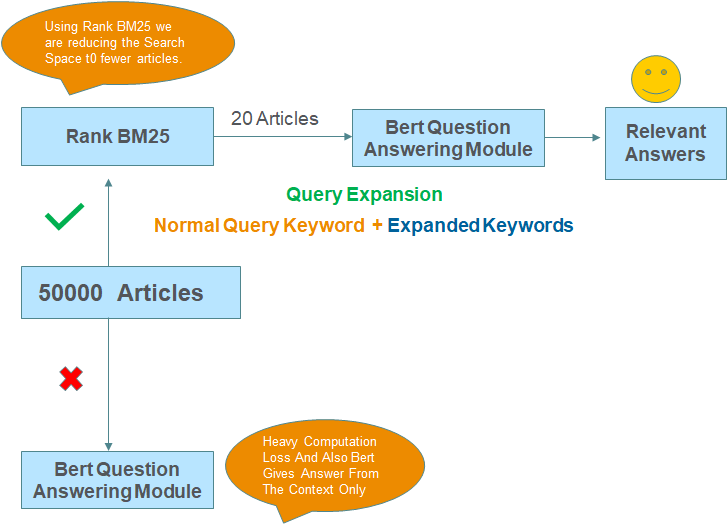

In [ ]:
!pip install scispacy

In [ ]:
#!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_ner_bc5cdr_md-0.2.4.tar.gz

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.



import re 
import string 
import nltk 
import spacy 
import pandas as pd 
import numpy as np 
import math 
from tqdm import tqdm 

from spacy.matcher import Matcher 
from spacy.tokens import Span 
from spacy import displacy 
import ast
import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import functools
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import scipy.stats.distributions as dists

#from scispacy.umls_linking import UmlsEntityLinker
#import en_ner_bc5cdr_md

from ipywidgets import widgets, interact, interactive, fixed, interact_manual, interactive_output, GridspecLayout, Layout, Button, Box, VBox, Accordion, DatePicker
from IPython.display import display, Image, HTML, Markdown, clear_output

display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.container { background-image: linear-gradient(-90deg, #FFFFFF,#DDDDDD,#FFFFFF,#DDDDDD, #FFFFFF) !important; }</style>"))

import json
!pip install rank_bm25 -q
from pathlib import Path, PurePath
from time import time
import nltk
from nltk.corpus import stopwords
import re
import string
import torch
from rank_bm25 import BM25Okapi
from math import ceil
! pip install -U pip


import spacy


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import networkx as nx
english_stopwords = list(set(stopwords.words('english')))

In [ ]:
! python -m spacy download 'en_core_web_md'
import en_core_web_md
nlp = en_core_web_md.load()

In [ ]:
! pip install swifter
import swifter

## Load MetaData

In [ ]:
def to_covid_json(json_files):
    jsonl = []
    for file_name in tqdm(json_files):
        row = {"doc_id": None, "title": None, "abstract": None, "body": None}

        with open(file_name) as json_data:
            data = json.load(json_data)
            print(data)
            
            break

            row['doc_id'] = data['paper_id']
            row['title'] = data['metadata']['title']
            
            abstract_list = [abst['text'] for abst in data['abstract']]
            abstract = "\n".join(abstract_list)
            row['abstract'] = abstract

            # And lastly the body of the text. 
            body_list = [bt['text'] for bt in data['body_text']]
            body = "\n".join(body_list)
            row['body'] = body
            
        jsonl.append(row)
    
    return jsonl
    

def get_data():
    try:
        with open('df_cache.pickle', 'rb') as f:
            df = pickle.load(f)
    except FileNotFoundError:
        df = pd.DataFrame(to_covid_json(json_files))
        with open('df_cache.pickle', 'wb') as f:
            pickle.dump(df, f)
    return df


In [ ]:
data_path = '../input/CORD-19-research-challenge'
metadata_path = data_path + '/metadata.csv'
metadata_df = pd.read_csv(metadata_path, dtype={'Microsoft Academic Paper ID': str, 'pubmed_id': str})

# **Analysis**

In [ ]:
metadata_df.head()

In [ ]:
cnt_srs = metadata_df['source_x'].value_counts()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color=cnt_srs.values,
        colorscale = 'Picnic',
        reversescale = True
    ),
)
layout = go.Layout(
    title='Research Paper Source Count',
    font=dict(size=18)
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="TargetCount")

In [ ]:
labels = (np.array(cnt_srs.index))
sizes = (np.array((cnt_srs / cnt_srs.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Research Paper Distribution',
    font=dict(size=18),
    width=600,
    height=600,
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="usertype")

In [ ]:
metadata_df.head()

In [ ]:
from wordcloud import WordCloud, STOPWORDS

# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    
    
    stopwords = english_stopwords
    more_stopwords = ['Abstract', 'Background', 'NaN','human','analyses','reveal','common','recent','army']
    stopwords.extend(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(metadata_df["abstract"], title="Word Cloud Of Abstract")

In [ ]:
metadata_df['abstract_length'] = metadata_df['abstract'].apply(lambda x : len(str(x).split()))
abstract_length = metadata_df[metadata_df['abstract_length']<3500]['abstract_length']

In [ ]:
abstract_length_distribution = go.Box(y=abstract_length.values, name = 'Research Paper Abstract Length', boxmean=True)
data = [abstract_length_distribution]
layout = go.Layout(title = "Abstract Length Distribution")
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

## Named Entity Recognition

In [ ]:
# from spacy import displacy

# import spacy
# bc5 = en_ner_bc5cdr_md.load()

# example_text = metadata_df['abstract'][5]
# example_text = 'Anti-malarial drug hydroxychloroquine shot to fame as it is shown to have shortened the time to clinical recovery of COVID-19 patients.'
# doc = bc5(example_text)
# colors = {
#     'CHEMICAL': 'lightpink',
#     'DISEASE': 'lightorange',
# }
# displacy.render(doc, style='ent', options={
#     'colors': colors
# })

## Dependency Parser Graph Analysis (Relation Extractor) 

In [ ]:
# edges = []
# example_text = 'Hydroxychloroquine is used in clinical recovery of COVID-19 patients.'
# doc = bc5(example_text)
# for token in doc:
#     # FYI https://spacy.io/docs/api/token
#     for child in token.children:
#         edges.append(('{0}'.format(token.lower_),
#                       '{0}'.format(child.lower_)))

# graph = nx.DiGraph(edges)

In [ ]:
# options = {
#     'node_color': 'yellow',
#     'node_size': 100,
#     'width': 1,
#     'arrowstyle': '-|>',
#     'arrowsize': 12,
# }


# nx.draw_networkx(graph, arrows=True, **options)

## Preprocessing Documents

### Applying The Logic :

* **If Abstract is Empty :**
    
    1. Fill by title
    
* **If Title is Empty :**
    
    1. Fill by Abstract 
    

In [ ]:

def strip_characters(text):
    t = re.sub('\(|\)|:|,|;|\.|’|”|“|\?|%|>|<', '', text)
    t = re.sub('/', ' ', t)
    t = t.replace("'",'')
    return t
def clean(text):
    t = text.lower()
    t = strip_characters(t)
    return t
def tokenize(text):
    words = nltk.word_tokenize(text)
    return list(set([word for word in words 
                     if len(word) > 1
                     and not word in english_stopwords
                     and not (word.isnumeric() and len(word) is not 4)
                     and (not word.isnumeric() or word.isalpha())] )
               )
def preprocess(text):
    t = clean(text)
    tokens = tokenize(t)
    return tokens

In [ ]:
metadata_df['abstract'].fillna('', inplace = True)
metadata_df['title'].fillna('', inplace = True)

In [ ]:
print("Documents where title is empty but abstract is present ",len(metadata_df[(metadata_df['title'] == '') &  (metadata_df['abstract']!= '')]))
print("Documents where title is present but abstract are absent", len(metadata_df[(metadata_df['title'] != '') &  (metadata_df['abstract']== '')]))

In [ ]:
def fill_abstract_with_title(abstract , title):
    if abstract == '':
        return title
    else:
        return abstract

def fill_title_with_abstract(abstract, title):
    if title == '':
        return abstract.split('\n')[0]
    else:
        return title

In [ ]:
metadata_df['abstract'] = metadata_df.apply(lambda x: fill_abstract_with_title(x['abstract'], x['title']), axis = 1)
metadata_df['title'] = metadata_df.apply(lambda x: fill_title_with_abstract(x['abstract'], x['title']), axis = 1)

In [ ]:
print("Documents where title is empty but abstract is present ",len(metadata_df[(metadata_df['title'] == '') &  (metadata_df['abstract']!= '')]))
print("Documents where title is present but abstract are absent", len(metadata_df[(metadata_df['title'] != '') &  (metadata_df['abstract']== '')]))

In [ ]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
wordnet_lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english')) 


def lemmatize_text(text):

    word_tokens = word_tokenize(text)    
    filtered_sentence = [] 

    for w in word_tokens: 
        filtered_sentence.append(w)
        
    lemma_word = []

    for w in filtered_sentence:
        word1 = wordnet_lemmatizer.lemmatize(w, pos = "n")
        word2 = wordnet_lemmatizer.lemmatize(word1, pos = "v")
        word3 = wordnet_lemmatizer.lemmatize(word2, pos = ("a"))
        lemma_word.append(word3)

    return ' '.join(lemma_word)

In [ ]:
metadata_df['abstract_cleaned'] = metadata_df['abstract'].apply(lambda x: clean(str(x)))
# metadata_df['abstract_cleaned'] = metadata_df['abstract_cleaned'].apply(lambda x: lemmatize_text(str(x)))

COVID19_SYNONYMS = [
                    'covid',
                    'coronavirus disease 19',
                    'sars cov 2', # Note that search function replaces '-' with ' '
                    '2019 ncov',
                    '2019ncov',
                    r'2019 n cov\b',
                    r'2019n cov\b',
                    'ncov 2019',
                    r'\bn cov 2019',
                    'coronavirus 2019',
                    'wuhan pneumonia',
                    'wuhan virus',
                    'wuhan coronavirus',
                    r'coronavirus 2\b'
]

def abstract_title_filter(df, search_string):
    return (df.abstract.str.lower().str.replace('-', ' ')
            .str.contains(search_string, na=False) |
            df.title.str.lower().str.replace('-', ' ')
            .str.contains(search_string, na=False))

def count_and_tag(df: pd.DataFrame,
                  synonym_list: list,
                  tag_suffix: str) -> (pd.DataFrame, pd.Series):
    counts = {}
    df[f'tag_{tag_suffix}'] = False
    for s in synonym_list:
        synonym_filter = abstract_title_filter(df, s)
        counts[s] = sum(synonym_filter)
        df.loc[synonym_filter, f'tag_{tag_suffix}'] = True
    print(f'Added tag_{tag_suffix} to DataFrame')
    return df, pd.Series(counts)

def add_tag_covid19(df):
    # Customised approach to include more complicated logic
    df, covid19_counts = count_and_tag(df, COVID19_SYNONYMS, 'disease_covid19')
    novel_corona_filter = (abstract_title_filter(df, 'novel corona') &
                           df.publish_time.str.startswith('2020', na=False))
    df.loc[novel_corona_filter, 'tag_disease_covid19'] = True
    covid19_counts = covid19_counts.append(pd.Series(index=['novel corona'],
                                                     data=[novel_corona_filter.sum()]))
    return df, covid19_counts

In [ ]:
covid_19_df = add_tag_covid19(metadata_df)
df_dedupe = covid_19_df[0][covid_19_df[0]['tag_disease_covid19'] == True].reset_index(drop = True)

In [ ]:
import re
from gensim.models import FastText

In [ ]:
to_remove_words = ['\n','Abstract','Intrduction',' +']
def join_noun_chunks(text):
    doc = nlp(text)
    noun_chunks = [chunk.text for chunk in doc.noun_chunks]
    tokens = [token.text for token in doc]
    counter = 0
    i = 0
    #tokens = text.split()
    final_text = ''
    #print('Noun Chunks are ', noun_chunks)
    while (i < (len(tokens))) and counter<len(noun_chunks):
        if(tokens[i] in noun_chunks[counter]):
            final_text = final_text + ' ' + '_'.join(noun_chunks[counter].split())
            i += len(noun_chunks[counter].split())
            counter += 1
        else:     
            final_text = final_text + ' ' + tokens[i] 
            i+=1
            
    return final_text.split()

In [ ]:
df_dedupe['abstract_n_gram'] = df_dedupe['abstract'].swifter.apply(join_noun_chunks)

In [ ]:
def tokenize(text):
    return [word.strip(string.punctuation).lower() for word in text.split() if word not in stop_words]


def create_sentences_df(data):
    sentences = []
    ids = []
    for idx, row in data.iterrows():
        
        # Create list of sentences from the paper's text
        sents = nltk.sent_tokenize(str(row['abstract_cleaned']))
        # Create a list where all elements are the paper's index number
        ids.extend([idx] * len(sents))
        sentences.extend(sents)

    df = pd.DataFrame({"Id": ids, "Sentence": sentences})
    # Drop sentences that are too short or too long
    df = df[(df.Sentence.map(len) >= 10) & (df.Sentence.map(len) <= 510)]

    # Remove period at the end of the sentence and also any period not followed by a digit
    df['Sentence'] = df['Sentence'].apply(lambda x: re.sub('\.(?!\d)', '', x))

    return df

In [ ]:
sentences_df = create_sentences_df(metadata_df)
sentences_df = sentences_df['Sentence'].apply(tokenize)

## Training Word2Vec Model 

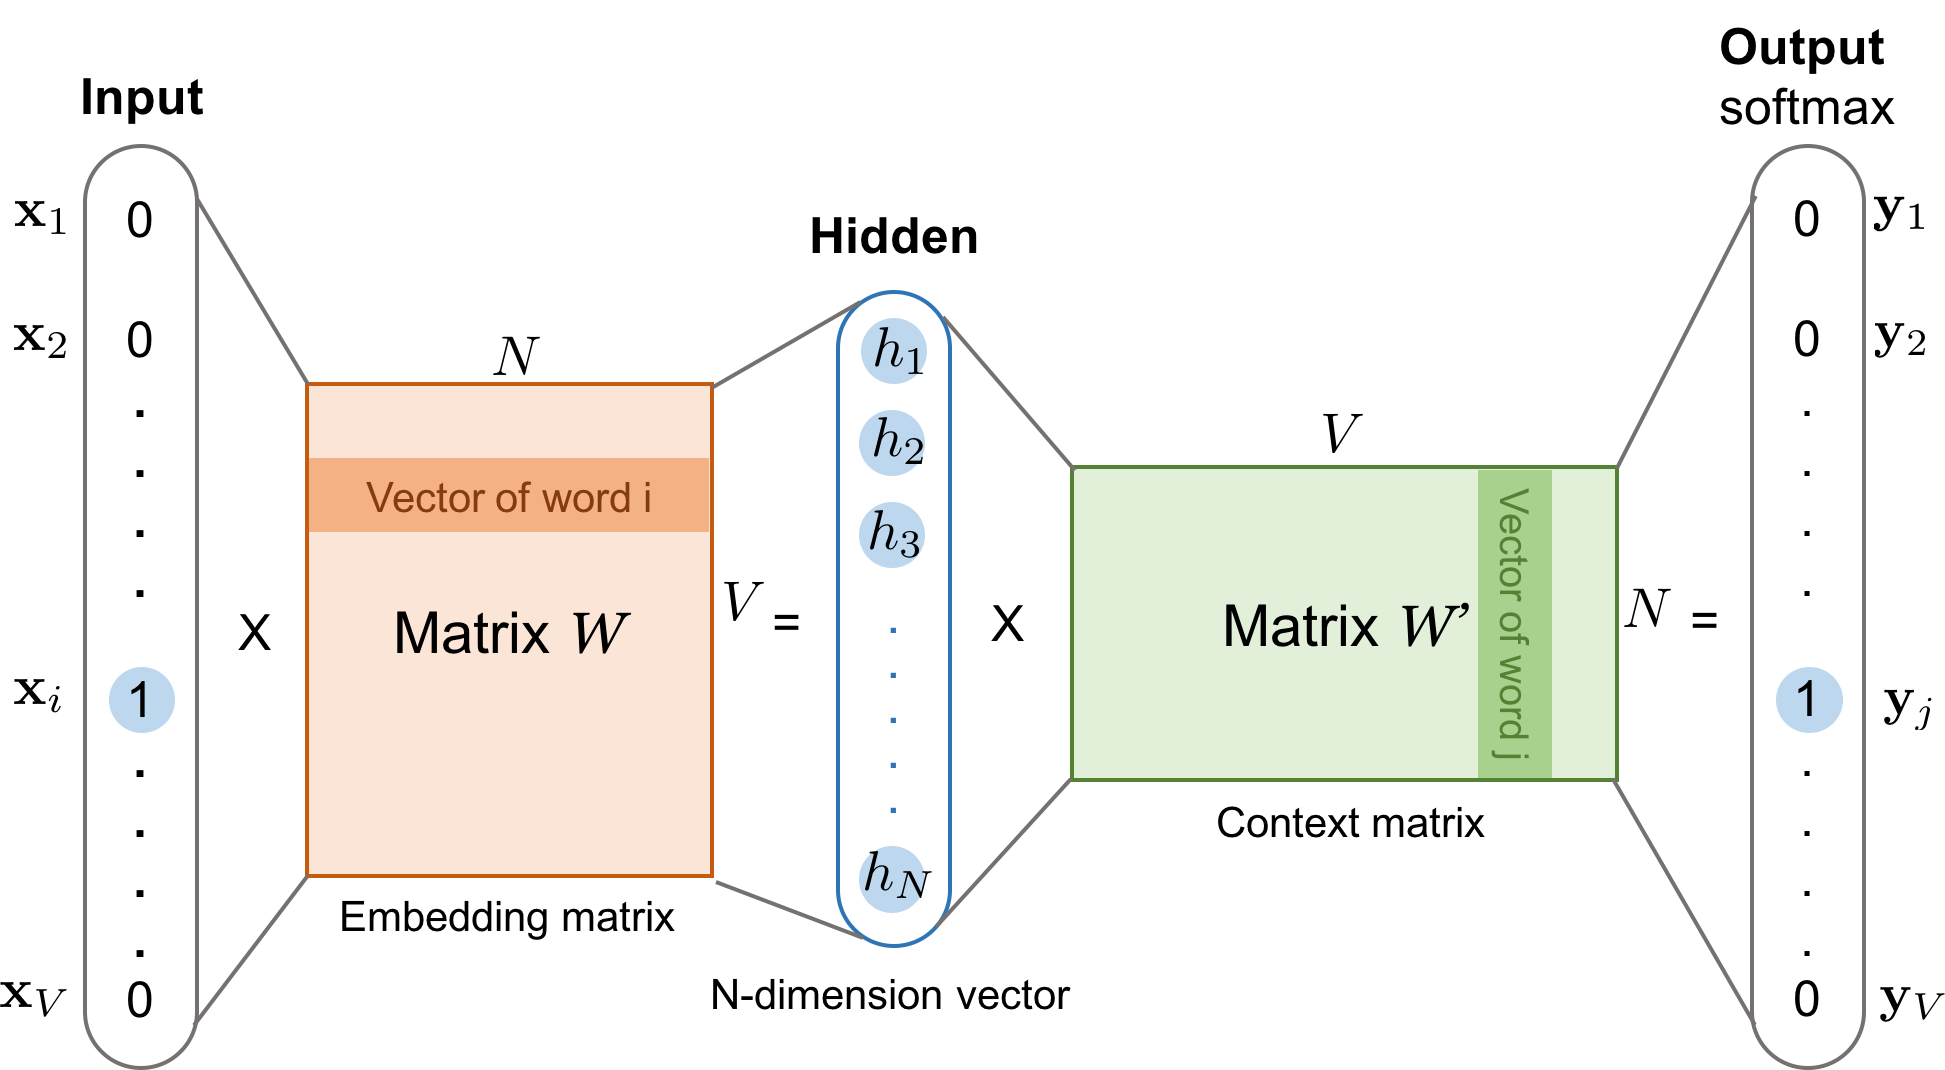

In [ ]:
from gensim.summarization.summarizer import summarize
from gensim.utils import simple_preprocess
from gensim.models.word2vec import Word2Vec
import gensim

In [ ]:
model_w2v = Word2Vec(
    sentences_df,
    size=200,
    window=5,
    min_count=10,
    sg=1,
    workers=10,
    iter=10)
# Normalize the word embeddings
model_w2v.init_sims(replace=True)

In [ ]:
similar_word_list = [elem[0] for elem in model_w2v.most_similar(lemmatize_text('virus'))]

In [ ]:
def tsne_plot(model, word_list):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in word_list:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x_cords = []
    y_cords = []
    
    for value in new_values:
        x_cords.append(value[0])
        y_cords.append(value[1])
        
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=x_cords,
        y=y_cords,
        mode="lines+markers+text",
        name="Lines, Markers and Text",
        text=word_list,
        textposition="top center"
    ))
        
    fig.show()

In [ ]:
from sklearn.manifold import TSNE
tsne_plot(model_w2v, similar_word_list)

## FastText Embedding 

In [ ]:
from gensim.models import FastText
model_fastext = FastText(min_count=1)
model_fastext.build_vocab(sentences_df)
model_fastext.train(sentences = sentences_df, total_examples=len(sentences_df), epochs=10)

In [ ]:
from gensim.test.utils import get_tmpfile
fname = get_tmpfile("fasttext_w2v.model")
model_fastext.save(fname)
model_fastext = FastText.load(fname)

## Loading Fast-Text Vectors On CoronaVirus Data

In [ ]:
model_fasttext_covid = FastText(min_count=1, size=200, window=5)
model_fasttext_covid.build_vocab(df_dedupe['abstract_n_gram'])

In [ ]:
model_fasttext_covid.train(sentences = df_dedupe['abstract_n_gram'], total_examples=len(df_dedupe['abstract_n_gram']), epochs=10)

## Query Expansion Logic 

We need to give Keywords to Rank BM25 Model, That would help us to get the relevant corpus in which Answer might be present.

We can find the words similar to those key-words from trained embeddings , And these similar Words would help in expanfing the Query. 





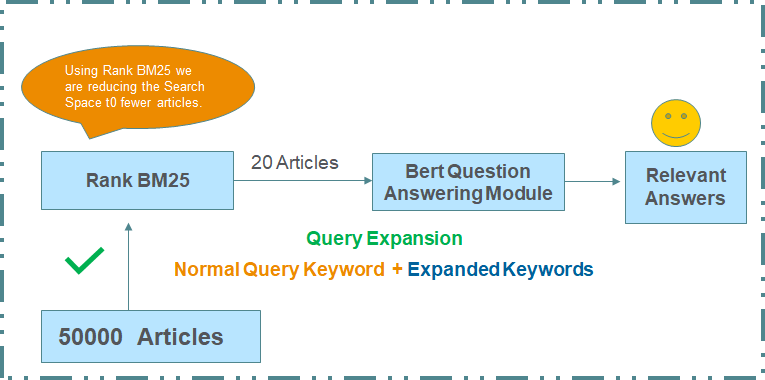

In [ ]:
covid_kaggle_questions = {
"data":[
          {
              "task": "What is known about transmission, incubation, and environmental stability?",
              "questions": [
                  "Is the virus transmitted by aerisol, droplets, food, close contact, fecal matter, or water?",
                  "How long is the incubation period for the virus?",
                  "Can the virus be transmitted asymptomatically or during the incubation period?",
                  "How does weather, heat, and humidity affect the tramsmission of 2019-nCoV?",
                  "How long can the 2019-nCoV virus remain viable on common surfaces?"
              ]
          },
          {
              "task": "What do we know about COVID-19 risk factors?",
              "questions": [
                  "What risk factors contribute to the severity of 2019-nCoV?",
                  "How does hypertension affect patients?",
                  "How does heart disease affect patients?",
                  "How does copd affect patients?",
                  "How does smoking affect patients?",
                  "How does pregnancy affect patients?",
                  "What is the fatality rate of 2019-nCoV?",
                  "What public health policies prevent or control the spread of 2019-nCoV?"
              ]
          },
          {
              "task": "What do we know about virus genetics, origin, and evolution?",
              "questions": [
                  "Can animals transmit 2019-nCoV?",
                  "What animal did 2019-nCoV come from?",
                  "What real-time genomic tracking tools exist?",
                  "What geographic variations are there in the genome of 2019-nCoV?",
                  "What effors are being done in asia to prevent further outbreaks?"
              ]
          },
          {
              "task": "What do we know about vaccines and therapeutics?",
              "questions": [
                  "What drugs or therapies are being investigated?",
                  "Are anti-inflammatory drugs recommended?"
              ]
          },
          {
              "task": "What do we know about non-pharmaceutical interventions?",
              "questions": [
                  "Which non-pharmaceutical interventions limit tramsission?",
                  "What are most important barriers to compliance?"
              ]
          },
          {
              "task": "What has been published about medical care?",
              "questions": [
                  "How does extracorporeal membrane oxygenation affect 2019-nCoV patients?",
                  "What telemedicine and cybercare methods are most effective?",
                  "How is artificial intelligence being used in real time health delivery?",
                  "What adjunctive or supportive methods can help patients?"
              ]
          },
          {
              "task": "What do we know about diagnostics and surveillance?",
              "questions": [
                  "What diagnostic tests (tools) exist or are being developed to detect 2019-nCoV?"
              ]
          },
          {
              "task": "Other interesting questions",
              "questions": [
                  "What is the immune system response to 2019-nCoV?",
                  "Can personal protective equipment prevent the transmission of 2019-nCoV?",
                  "Can 2019-nCoV infect patients a second time?"
              ]
          }
   ]
}

In [ ]:
for tasks in covid_kaggle_questions["data"]:
    doc = nlp(tasks['task'])
    for chunk in doc.noun_chunks:
        if(chunk.text == 'What' or chunk.text == 'we'):
            continue
        print(lemmatize_text(chunk.text))
        print('FastText Model')
        print('\t',model_fastext.most_similar(lemmatize_text(chunk.text)))
        print('\nFast Text Filtered Model')
        print('\t',model_fasttext_covid.most_similar(lemmatize_text(chunk.text)))
#         print('Word2Vec Model')
#         try:
#             print('\t',model_w2v.most_similar(lemmatize_text(chunk.text)))
#         except:
#             print('Phrase Not in Vocabulary')
        print('\n\n')

## Handling Out Of Vocabulary Words

In [ ]:
def get_statistical_vector(w2v_model, input_words):
    
    words = input_words.split(' ')
    embedding_matrix = []
    
    for word in words:
        try:
            embedding_matrix.append(w2v_model[word])
        except:
            embedding_matrix.append([0]*len(w2v_model['the']))
    
    embedding_max = np.max(embedding_matrix, axis = 0)
    embedding_min = np.min(embedding_matrix, axis = 0)
    embedding_avg = np.mean(embedding_matrix, axis = 0)
    
    return embedding_max, embedding_min, embedding_avg

In [ ]:
embedding_max, embedding_min, embedding_avg = get_statistical_vector(model_w2v, 'risk factor')

In [ ]:
model_w2v.similar_by_vector(embedding_max)

In [ ]:
model_w2v.similar_by_vector(embedding_min)

In [ ]:
model_w2v.similar_by_vector(embedding_avg)

## **Search Engine Implementation**

In [ ]:
from nltk.corpus import stopwords
raw_search_str = metadata_df.abstract.fillna('') + metadata_df.title.fillna('')

In [ ]:
# adapted from https://www.kaggle.com/dgunning/building-a-cord19-research-engine-with-bm25
english_stopwords = list(set(stopwords.words('english')))

In [ ]:
def remove_special_character(text):
    """
    Remove all special character from text string
    """
    return text.translate(str.maketrans('', '', string.punctuation))


def tokenize(text):
    """
    Tokenize with NLTK

    Rules:
        - drop all words of 1 and 2 characters
        - drop all stopwords
        - drop all numbers
    """
    words = nltk.word_tokenize(text)
    return list(set([word for word in words 
                     if len(word) > 1
                     and not word in english_stopwords
                     and not word.isnumeric() 
                    ])
               )

def preprocess(text):
    """
    Clean and tokenize text input
    """
    return tokenize(remove_special_character(text.lower()))

In [ ]:
preprocess('medical care')

In [ ]:
def search_bm25_dataframe(query, num):
    new_words = ''
    doc = nlp(query)
    key_expanded_final = []
    for chunk in doc.noun_chunks:
        if(chunk.text == 'What' or chunk.text == 'we'):
            continue
        else:
            similar_words = model_fasttext_covid.most_similar(chunk.text)
            keywords_expanded = [word[0].replace('_',' ') for word in similar_words[:5]]
            keywords_expanded = [word for word in keywords_expanded if word not in query]
            
        key_expanded_final = key_expanded_final + keywords_expanded
    
    key_expanded_final = ' '.join(list(set(key_expanded_final)))    
        
    print('Expanded Keywords', key_expanded_final)
    query = query + key_expanded_final
    
    query = preprocess(query)
    doc_scores = bm25.get_scores(query)
    selected_indexes = np.argsort(doc_scores)[-num:]
    #print('Selected Indexes are ',selected_indexes)
    result_df = metadata_df.iloc[selected_indexes]
    #print('Result Dataframe ',result_df.head())
    result_df['scores'] = doc_scores[selected_indexes]
    #print(result_df['scores'])
    result_df = result_df[result_df['scores']>0]
    result_df = result_df.reset_index(drop = True)
    
    #print(result_df)
    return result_df  

In [ ]:
metadata_df['tokenized_abstract_title'] = metadata_df.apply(lambda x: preprocess(str(x['abstract'])+str(x['title'])), axis = 1)
bm25 = BM25Okapi(metadata_df['tokenized_abstract_title'].tolist())

## **Bert Question Answering Module**

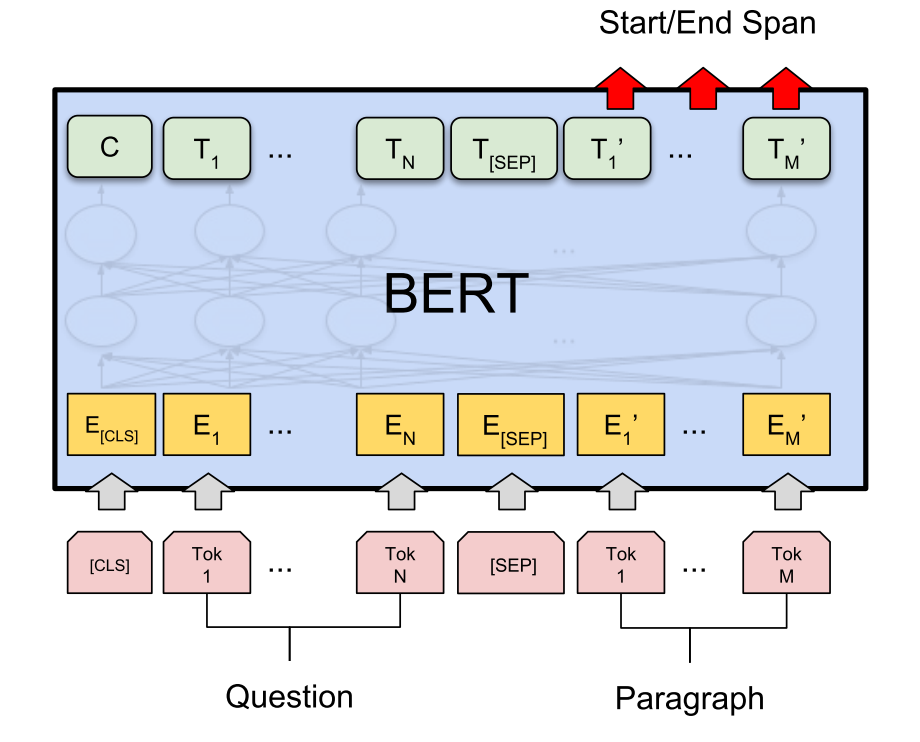

In [ ]:
import torch
from transformers import BertTokenizer
from transformers import BertForQuestionAnswering

NUM_CONTEXT_FOR_EACH_QUESTION = 10

torch_device = 'cuda' if torch.cuda.is_available() else 'cpu'

print("Code running on: {}".format(torch_device) )

In [ ]:
BERT_SQUAD = 'bert-large-uncased-whole-word-masking-finetuned-squad'

model = BertForQuestionAnswering.from_pretrained(BERT_SQUAD)
tokenizer = BertTokenizer.from_pretrained(BERT_SQUAD)

model = model.to(torch_device)
model.eval()

In [ ]:
context = search_bm25_dataframe('Is the virus transmitted by aerisol, droplets, food, close contact, fecal matter, or water?', 20)

In [ ]:
#search_bm25_dataframe('What are the risk factors of coronavirus ?', 20)

In [ ]:
def get_rel_span(question , context):
    
    encoded_dict = tokenizer.encode_plus(
                    question, context, # Sentence to encode.
                    add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                    max_length = 256,  # Pad & truncate all sentences.
                    pad_to_max_length = True,
                    return_attention_mask = True,   # Construct attn. masks.
                    return_tensors = 'pt'     # Return pytorch tensors.
               )
    
    input_ids = encoded_dict['input_ids'].to(torch_device)
    token_type_ids = encoded_dict['token_type_ids'].to(torch_device)
    
    all_tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
    start_scores, end_scores = model(input_ids, token_type_ids=token_type_ids)
    answer = tokenizer.convert_tokens_to_string(all_tokens[torch.argmax(start_scores) : torch.argmax(end_scores)+1])
    
    return answer
    

In [ ]:
## Getting Sample Answer before generalizing. 

def on_search_button_click(_):
    #print('Entered')
    with out:
        clear_output(True)
        #print('Entered')
        question = search_box.value
        #print('Question is ', question)
        context = search_bm25_dataframe(question, 20)

        context = context[:min(len(context), 10)]
        context['rel_span'] = context['abstract'].apply(lambda x:get_rel_span(question,x))
        context= context[['url','title','doi','pmcid','abstract','publish_time','rel_span']].reset_index(drop = True)
        show_df = context[['title','abstract','rel_span']].reset_index(drop = True)
        display(show_df)
        #display(context)
        #display(context)
        items = []
        summaries = []
        
        for i,result in enumerate(context['rel_span']):
            sent = context.loc[i, 'abstract']
            word_tokens = word_tokenize(str(sent))
            summary = ''
            for word in word_tokens:
                if word in stop_words:
                    summary += word+' '
                    continue
                if word in str(result):
                    summary += '<mark>'+word+'</mark>'
                else:
                    summary += word+' '
                    
            summaries.append(summary)
            
            

        for i in range(len(context)):
            sum_text = widgets.HTML(value='<h3><a href='+str(context['url'][i])+'>'+str(context['title'][i])+'</a></h3><b>'+str(context['publish_time'][i])+'</b>: '+'\n'+str(summaries[i]),
                                placeholder='',description='')
            items.append(sum_text)

        box3 = VBox(children=items)
        display(box3)

In [ ]:
from ipywidgets import widgets, interact, interactive, fixed, interact_manual, interactive_output, GridspecLayout, Layout, Button, Box, VBox, Accordion, DatePicker
from IPython.html import widgets
from IPython.display import display, Image, HTML, Markdown, clear_output

In [ ]:
label_layout = Layout(width='900px',height='30px')
button_layout = Layout(width='100px',height='30px') 

search_box = widgets.Text(
    placeholder='What are the factors responsible for coronavirus attack ?',
    description='Search:', layout = label_layout
)

search_button = widgets.Button(description="Search", button_style='warning', layout = button_layout)
search_button.on_click(on_search_button_click)

In [ ]:
out = widgets.Output()

In [ ]:
for tasks in covid_kaggle_questions["data"]:
    print(tasks['task'])
    for question in tasks['questions']:
        print('\t',question)
    print('\n\n')

In [ ]:
widgets.VBox([search_box, search_button, out])

In [ ]:
# def get_answer_question(query, query_context):
    
# #     print(query)
# #     print(query_context)
#     encoded_dict = tokenizer.encode_plus(
#                         query, query_context, # Sentence to encode.
#                         add_special_tokens = True, # Add '[CLS]' and '[SEP]'
#                         max_length = 256,  # Pad & truncate all sentences.
#                         pad_to_max_length = True,
#                         return_attention_mask = True,   # Construct attn. masks.
#                         return_tensors = 'pt'     # Return pytorch tensors.
#                    )
#     input_ids = encoded_dict['input_ids'].to(torch_device)
#     token_type_ids = encoded_dict['token_type_ids'].to(torch_device)

#     all_tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
#     start_scores, end_scores = model(input_ids, token_type_ids=token_type_ids)
#     answer = tokenizer.convert_tokens_to_string(all_tokens[torch.argmax(start_scores) : torch.argmax(end_scores)+1])

#     #print(answer)
#     return answer


# def get_all_context(query, num_results):
    
#     possible_contexts_df = search_bm25_dataframe(query, num_results)
#     possible_contexts = possible_contexts_df['abstract'].str.replace("Abstract", "").tolist()
    
#     return possible_contexts


# def get_all_answers(question, all_context):
#     # Return a list of all answers, given a question and a list of context
    
#     all_answers = []
    
#     for context in all_context:
#         all_answers.append(get_answer_question(question, context))
#     return all_answers
        

In [ ]:
# def create_output_results(question, all_contexts, all_answers, summary_answer, summary_context):
#     # Return results on a dictionary
    
#     def find_start_end_index_substring(context, answer):   
#         search_re = re.search(re.escape(answer.lower()), context.lower())
#         if search_re:
#             return search_re.start(), search_re.end()
#         else:
#             return 0, len(context)
        
#     output = {}
#     output['question'] = question
#     output['summary_answer'] = summary_answer
#     output['summary_context'] = summary_context
#     results = []
#     for c, a in zip(all_contexts, all_answers):

#         span = {}
#         span['context'] = c
#         span['answer'] = a
#         span['start_index'], span['end_index'] = find_start_end_index_substring(c,a)

#         results.append(span)
    
#     output['results'] = results
        
#     return output

In [ ]:
# def get_results(question, summarize=False, num_results=NUM_CONTEXT_FOR_EACH_QUESTION, verbose=True):
#     # Return a dict object containg a list of all context and answers related to the (sub)question

#     if verbose:
#         print("Getting context ...")
#     all_contexts = get_all_context(question, num_results)
    
#     if verbose:
#         print("Answering to all questions ...")
#     all_answers = get_all_answers(question, all_contexts)
    
#     summary_answer = ''
#     summary_context = ''
#     if verbose and summarize:
#         print("Adding summary ...")
#     if summarize:
#         summary_answer = get_summary(all_answers)
#         summary_context = get_summary(all_contexts)
    
#     if verbose:
#         print("output.")
    
#     return create_output_results(question, all_contexts, all_answers, summary_answer, summary_context)

In [ ]:
# NUM_CONTEXT_FOR_EACH_QUESTION = 20

In [ ]:
# covid_kaggle_questions = {
# "data":[
#           {
#               "task": "What is known about transmission, incubation, and environmental stability?",
#               "questions": [
#                   "Is the virus transmitted by aerisol, droplets, food, close contact, fecal matter, or water?",
#                   "How long is the incubation period for the virus?",
#                   "Can the virus be transmitted asymptomatically or during the incubation period?",
#                   "How does weather, heat, and humidity affect the tramsmission of 2019-nCoV?",
#                   "How long can the 2019-nCoV virus remain viable on common surfaces?"
#               ]
#           },
#           {
#               "task": "What do we know about COVID-19 risk factors?",
#               "questions": [
#                   "What risk factors contribute to the severity of 2019-nCoV?",
#                   "How does hypertension affect patients?",
#                   "How does heart disease affect patients?",
#                   "How does copd affect patients?",
#                   "How does smoking affect patients?",
#                   "How does pregnancy affect patients?",
#                   "What is the fatality rate of 2019-nCoV?",
#                   "What public health policies prevent or control the spread of 2019-nCoV?"
#               ]
#           },
#           {
#               "task": "What do we know about virus genetics, origin, and evolution?",
#               "questions": [
#                   "Can animals transmit 2019-nCoV?",
#                   "What animal did 2019-nCoV come from?",
#                   "What real-time genomic tracking tools exist?",
#                   "What geographic variations are there in the genome of 2019-nCoV?",
#                   "What effors are being done in asia to prevent further outbreaks?"
#               ]
#           },
#           {
#               "task": "What do we know about vaccines and therapeutics?",
#               "questions": [
#                   "What drugs or therapies are being investigated?",
#                   "Are anti-inflammatory drugs recommended?"
#               ]
#           },
#           {
#               "task": "What do we know about non-pharmaceutical interventions?",
#               "questions": [
#                   "Which non-pharmaceutical interventions limit tramsission?",
#                   "What are most important barriers to compliance?"
#               ]
#           },
#           {
#               "task": "What has been published about medical care?",
#               "questions": [
#                   "How does extracorporeal membrane oxygenation affect 2019-nCoV patients?",
#                   "What telemedicine and cybercare methods are most effective?",
#                   "How is artificial intelligence being used in real time health delivery?",
#                   "What adjunctive or supportive methods can help patients?"
#               ]
#           },
#           {
#               "task": "What do we know about diagnostics and surveillance?",
#               "questions": [
#                   "What diagnostic tests (tools) exist or are being developed to detect 2019-nCoV?"
#               ]
#           },
#           {
#               "task": "Other interesting questions",
#               "questions": [
#                   "What is the immune system response to 2019-nCoV?",
#                   "Can personal protective equipment prevent the transmission of 2019-nCoV?",
#                   "Can 2019-nCoV infect patients a second time?"
#               ]
#           }
#    ]
# }

In [ ]:
# all_tasks = []


# for i, t in enumerate(covid_kaggle_questions['data']):
#     print("Answering question to task {}. ...".format(i+1))
#     answers_to_question = []
#     for q in t['questions']:
#             answers_to_question.append(get_results(q, verbose=False))
#     task = {}
#     task['task'] = t['task']
#     task['questions'] = answers_to_question
    
#     all_tasks.append(task)

In [ ]:
# all_rows = []
# for tasks in all_tasks:
#     task_question = tasks['task']
#     for sub_question_summary in tasks['questions']:
#         sub_question = sub_question_summary['question']
#         for result in sub_question_summary['results']:
#             result_context = result['context']
#             result_answer = result['answer']
#             all_rows.append([task_question, sub_question, result_context, result_answer])
        

In [ ]:
# final_results_df = pd.DataFrame(all_rows)

In [ ]:
# final_results_df.to_excel('Question Answering System.xlsx', index = False)